-----
# **K NEAREST NEIGHBOUR**
----

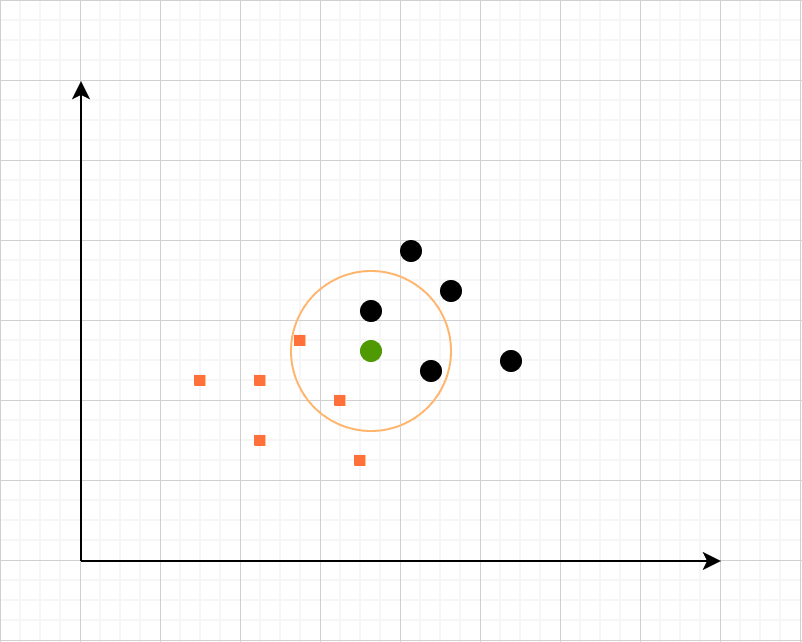

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('/content/knn_data.txt')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


## Normalize the variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
sc_transform = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [9]:
sc_df = pd.DataFrame(sc_transform)
sc_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = sc_transform
y = df['TARGET CLASS']
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
error_rates = []

for i in range(1,40):
  k = i
  knn = KNeighborsClassifier(n_neighbors= k)
  knn.fit(X_train,y_train)
  preds = knn.predict(X_test)
  error_rates.append(np.mean(y_test - preds))

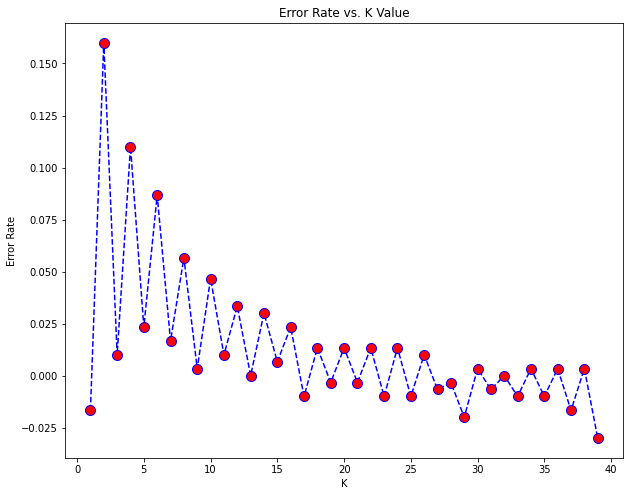

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

k = 30
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[134  26]
 [ 27 113]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       160
           1       0.81      0.81      0.81       140

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



## **Benefits of using KNN algorithm**

* KNN algorithm is widely used for different kinds of learnings because of its  uncomplicated and easy to apply nature.
* There are only two metrics to provide in the algorithm. value of k and distance metric.
* Work with any number of classes not just binary classifiers.
* It is fairly easy to add new data to algorithm.
 

## **Disadvantages of KNN algorithm**
* The cost of predicting the k nearest neighbours is very high.
* Doesn’t work as expected when working with big number of features/parameters.
* Hard to work with categorical features.